# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from scipy import stats
import statsmodels.api as sm

In [2]:
#load data 
with zipfile.ZipFile('concrete+compressive+strength.zip') as z:
    with z.open('Concrete_Data.xls') as f:
        data = pd.read_excel(f)

In [3]:
#get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
#describe data
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
data.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
802,339.00,0.0,0.00,185.00,0.00,1060.0,754.0,28,31.646948
112,439.00,177.0,0.00,186.00,11.10,884.9,707.9,7,56.095767
385,520.00,0.0,0.00,170.00,5.20,855.0,855.0,28,60.280887
967,154.80,183.4,0.00,193.30,9.10,877.2,867.7,28,23.786922
942,313.30,145.0,0.00,178.50,8.00,867.2,824.0,28,40.925227
873,237.00,92.0,71.00,247.00,6.00,853.0,695.0,28,28.627044
498,355.00,19.0,97.00,145.00,12.25,967.0,871.0,28,55.454555
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.9,28,25.724350
964,143.70,170.2,132.60,191.60,8.50,814.1,805.3,28,29.870858
744,281.00,0.0,0.00,186.00,0.00,1104.0,774.0,7,14.499680


In [6]:
#get unique values per
data.nunique()

Cement (component 1)(kg in a m^3 mixture)                280
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    187
Fly Ash (component 3)(kg in a m^3 mixture)               163
Water  (component 4)(kg in a m^3 mixture)                205
Superplasticizer (component 5)(kg in a m^3 mixture)      155
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        304
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          938
dtype: int64

In [7]:
#get number of nulls
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
#check for duplicates
data.duplicated().sum()

25

In [9]:
#remove duplicates
data = data.drop_duplicates()

In [10]:
#check for duplicates again
data.duplicated().sum()

0

In [11]:
#rename some of the column names
data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash',
                'Water', 'Superplasticizer', 'Coarse_Aggregate',
                'Fine_Aggregate', 'Age (Days)', 'Compressive_Strength (MPa)']

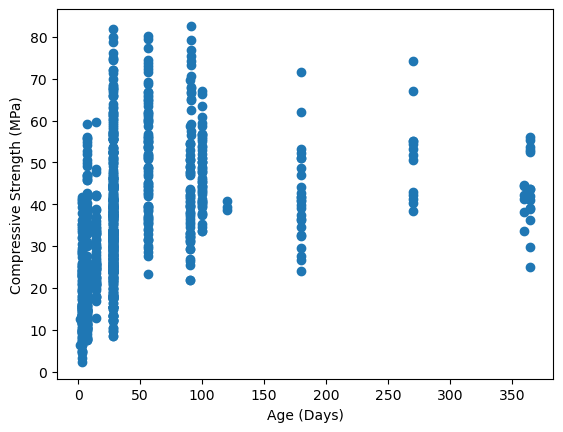

In [64]:
plt.scatter(data['Age (Days)'], data['Compressive_Strength (MPa)'])
plt.xlabel('Age (Days)')
plt.ylabel('Compressive Strength (MPa)')
plt.show()

exclude Age, from analysis.ipynb there wasn't a clear pattern, but there was mild correlation with compressive strength
make copy of data, drop Age, calc components as a percent of total

In [62]:
age_list = list(data['Age (Days)'].values)
age_list.sort()
set(age_list)


{1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365}

In [18]:
#make copy and drop Age
copy = data.copy()
copy.drop('Age (Days)', inplace=True, axis=1)

In [28]:
#make function to calculate total
def get_percentages(dataframe):
    my_kg = dataframe.iloc[:, :-1].sum(axis=1)
    my_copy = dataframe.copy()
    my_copy.iloc[:, :-1] = dataframe.iloc[:, :-1].div(my_kg, axis=0) * 100
    return my_copy

In [29]:
#get df of percentage of value per total
percentage_df = get_percentages(copy)
percentage_df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Compressive_Strength (MPa)
0,22.309440,0.000000,0.000000,6.692832,0.103284,42.966329,27.928114,3.198822
1,22.172039,0.000000,0.000000,6.651612,0.102648,43.317594,27.756108,2.478084
2,14.917003,6.393001,0.000000,10.228802,0.000000,41.812472,26.648721,1.774559
3,14.917003,6.393001,0.000000,10.228802,0.000000,41.812472,26.648721,1.808450
4,8.534961,5.689974,0.000000,8.251322,0.000000,42.047359,35.476385,1.868090
...,...,...,...,...,...,...,...,...
1025,11.967440,5.022515,3.909768,7.776238,0.385348,37.673190,33.265501,1.881331
1026,14.159525,0.000000,5.080202,8.613492,0.457042,35.943749,35.745990,1.351675
1027,6.548485,6.147198,4.788993,8.497597,0.268995,39.352648,34.396084,1.034155
1028,6.883870,8.078055,0.000000,7.597785,0.488924,42.817584,34.133783,1.397973


# Percentage_df Exploration

In [32]:
#function to plot Histogram
def make_histogram(dataframe, num_rows, num_cols, fig_size=tuple):
    columns = list(dataframe.columns) #get input columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size) #declare size
    # Plot histograms for each feature
    for i, col in enumerate(columns):
        row, subplot_col = divmod(i, num_cols)
        axs[row, subplot_col].hist(dataframe[col], color='skyblue', edgecolor='black')
        axs[row, subplot_col].set_title(columns[i])
        axs[row, subplot_col].set_xlabel('Value')
        axs[row, subplot_col].set_ylabel('Frequency')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


def make_boxplots(dataframe, num_rows, num_cols, fig_size=tuple):
    columns = list(dataframe.columns) #get input columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size) #declare size
    # Plot histograms for each feature
    for i, col in enumerate(columns):
        row, subplot_col = divmod(i, num_cols)
        axs[row, subplot_col].boxplot(dataframe[col])
        axs[row, subplot_col].set_title(columns[i])
        axs[row, subplot_col].set_ylabel('Value')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
     


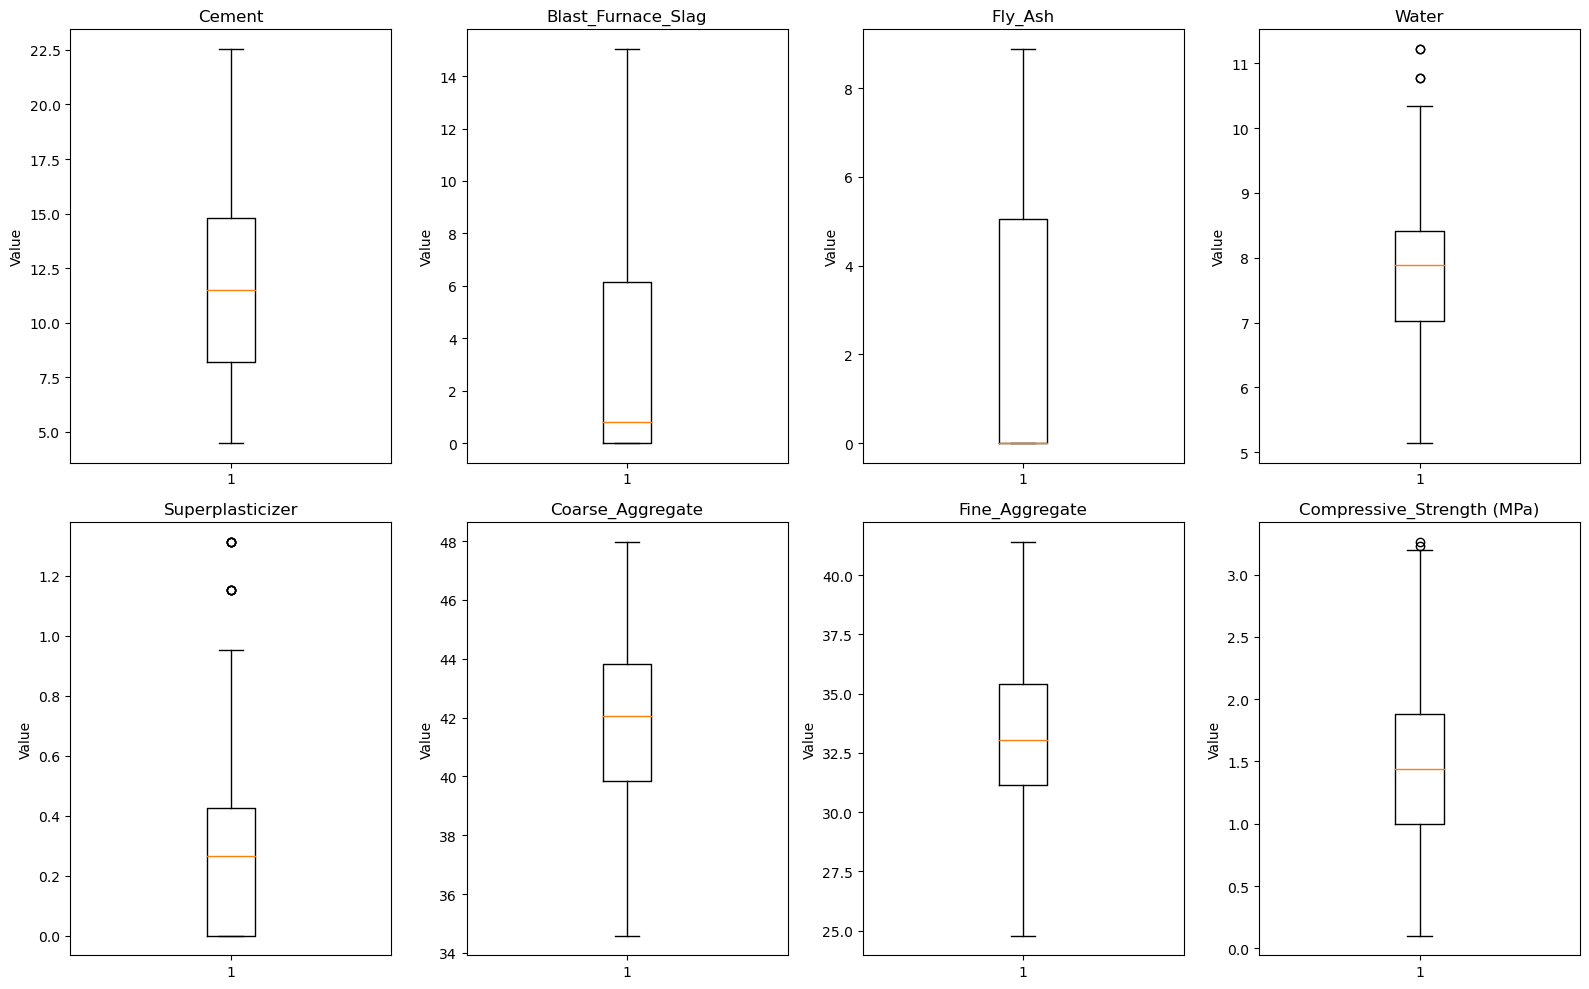

In [33]:
#plot box plots
make_boxplots(percentage_df, 2, 4, (16, 10))

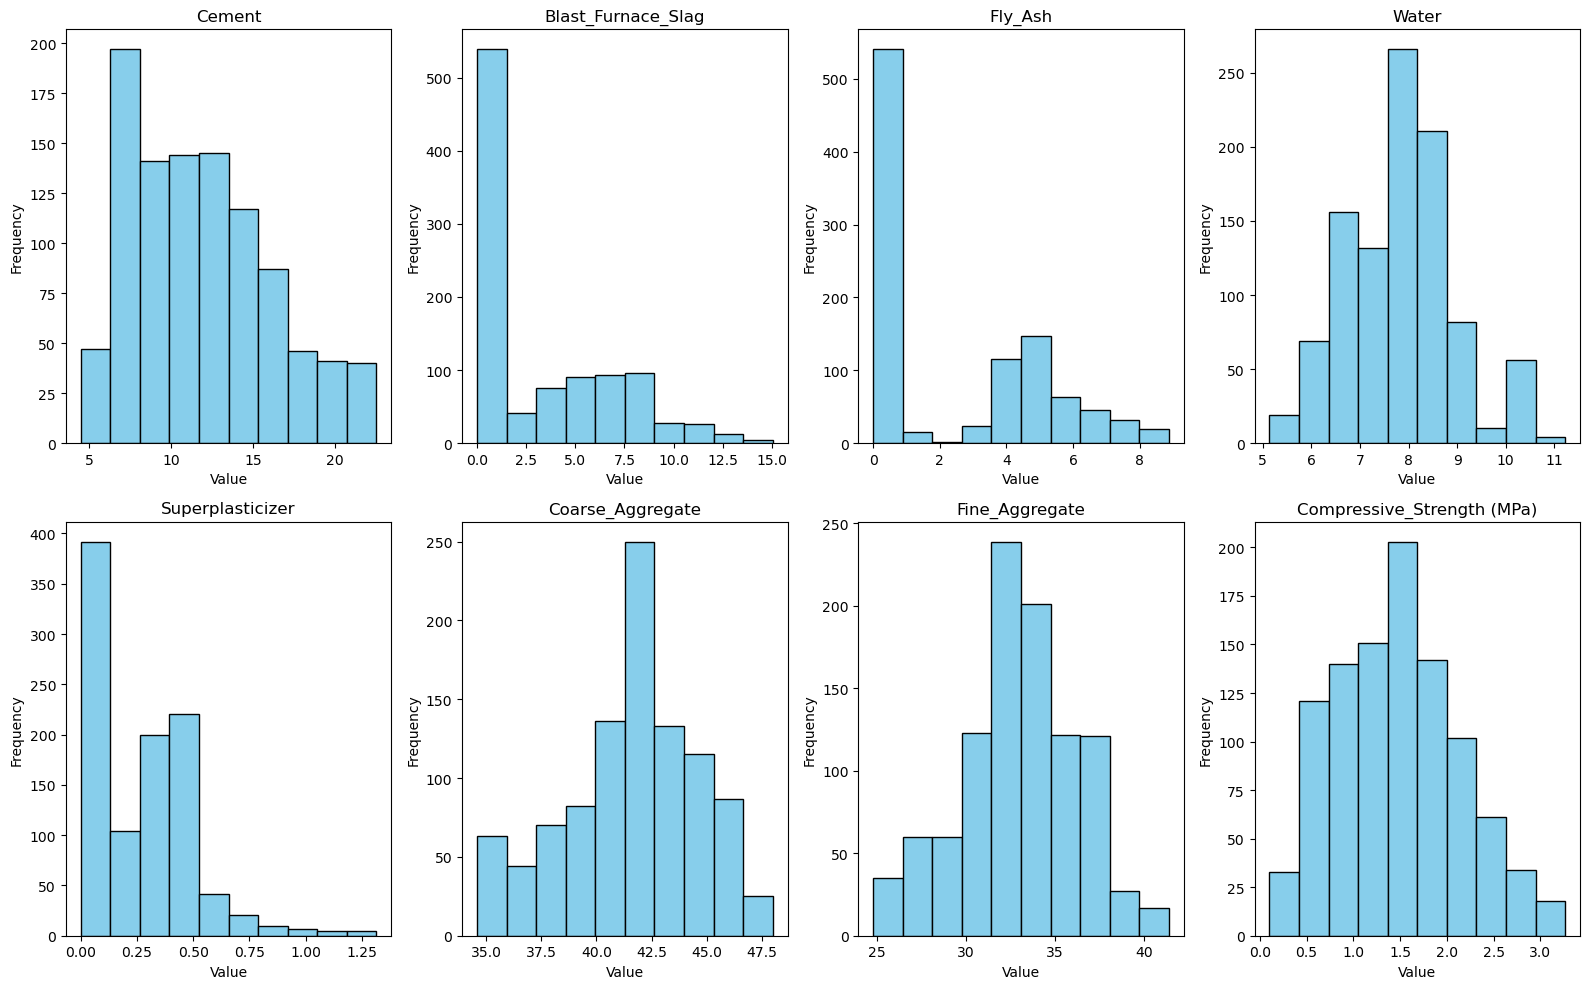

In [34]:
#make histograms
make_histogram(percentage_df, 2, 4, (16, 10))

Let's perform a test to quantify normality of our data. Will use Shapiro Wilk and Q-Q plots

Tests:
- Ho: The data is normally distributed
- Ha: The data is not normally distributed

In [35]:
# function to test for normal distribution
def test_normality(dataframe, feature, alpha):
    result = stats.shapiro(dataframe[feature])
    if result.pvalue < alpha:
        print("The p-value is less than the alpha; reject Ho.")
        print("ShapiroResult (statistic={}, pvalue={})".format(result.statistic, result.pvalue))
    else:
        print("The p-value is greater than the alpha; failed to reject Ho.")
        print("ShapiroResult (statistic={}, pvalue={})".format(result.statistic, result.pvalue))

def make_qq_plots(dataframe, feature):
   # Calculate quartiles for the specified feature
    quartiles = np.percentile(dataframe[feature], [25, 50, 75, 100])

    # Create a normal distribution with the same number of data points
    normal_data = np.random.normal(size=len(dataframe[feature]))

    # Sort both datasets
    data_sorted = np.sort(dataframe[feature])
    normal_sorted = np.sort(normal_data)

    # Create the customized Q-Q plot
    plt.figure(figsize=(8, 6))
    plt.scatter(normal_sorted, data_sorted, color='b', alpha=0.6, label='Data')
    plt.plot([normal_sorted.min(), normal_sorted.max()], [data_sorted.min(), data_sorted.max()], color='r', label='45-degree line')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Q-Q Plot for {feature}')
    plt.grid(True)
    plt.legend()
    plt.show()

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9557180404663086, pvalue=7.375658502225028e-17)


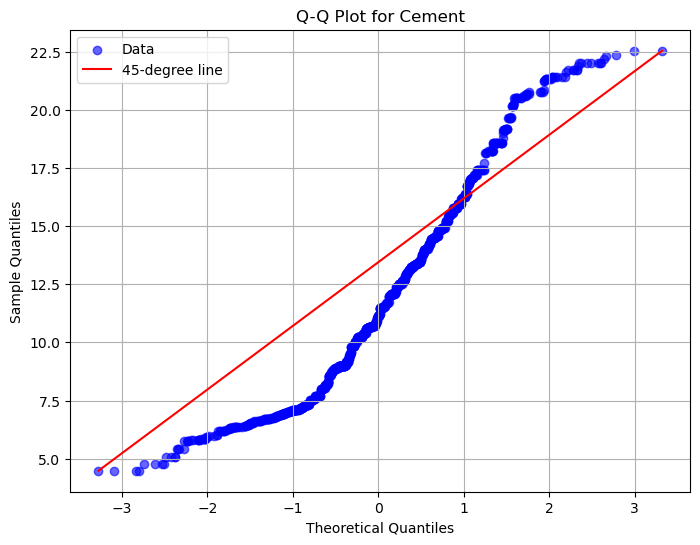

In [36]:
#test for Cement
test_normality(percentage_df, 'Cement', alpha=0.05)

#make qq plot for cement
make_qq_plots(percentage_df, 'Cement')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.8039891719818115, pvalue=3.525060336960383e-33)


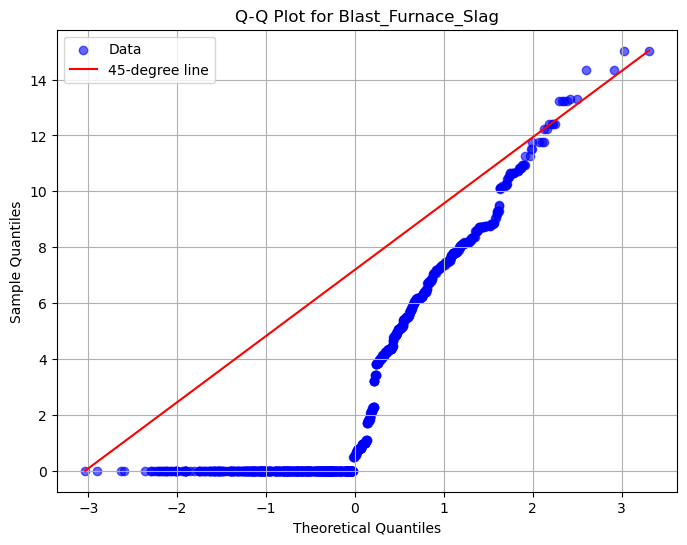

In [37]:
#test for blast
test_normality(percentage_df, 'Blast_Furnace_Slag', alpha=0.05)

#make qq plot for blast
make_qq_plots(percentage_df, 'Blast_Furnace_Slag')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.7715232968330383, pvalue=3.4151442797982434e-35)


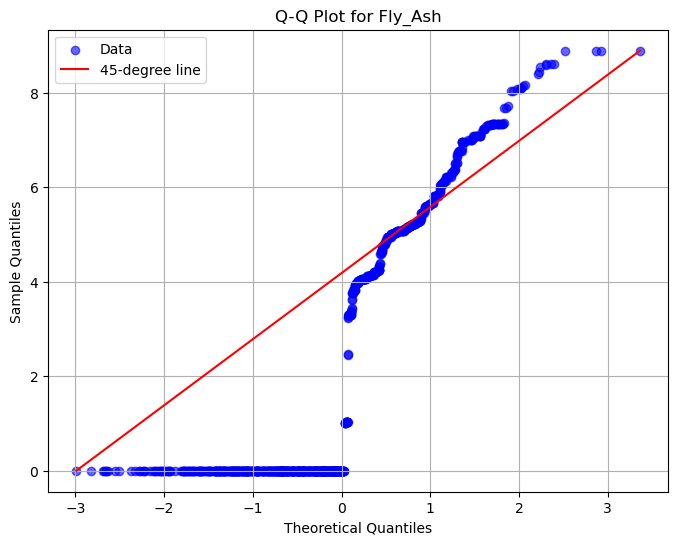

In [38]:
#test for fly asg
test_normality(percentage_df, 'Fly_Ash', alpha=0.05)

#make qq plot for fly ash
make_qq_plots(percentage_df, 'Fly_Ash')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.978754997253418, pvalue=6.000870633737776e-11)


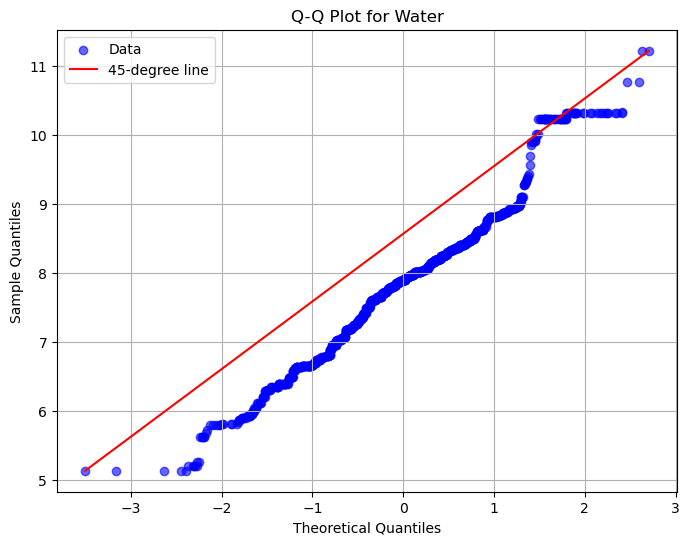

In [39]:
#test for water
test_normality(percentage_df, 'Water', alpha=0.05)

#make qq plot for water
make_qq_plots(percentage_df, 'Water')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.8619335293769836, pvalue=8.27990866495478e-29)


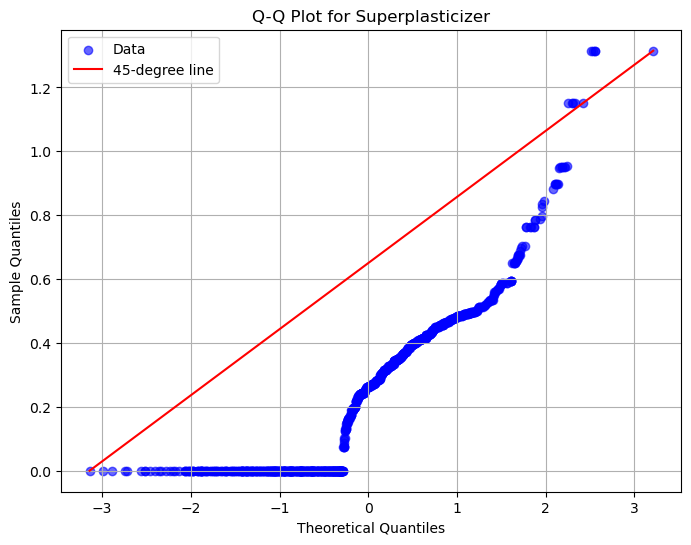

In [40]:
#test for superplastizier
test_normality(percentage_df, 'Superplasticizer', alpha=0.05)

#make qq plot for superplastizier
make_qq_plots(percentage_df, 'Superplasticizer')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9740238189697266, pvalue=1.9980837730887435e-12)


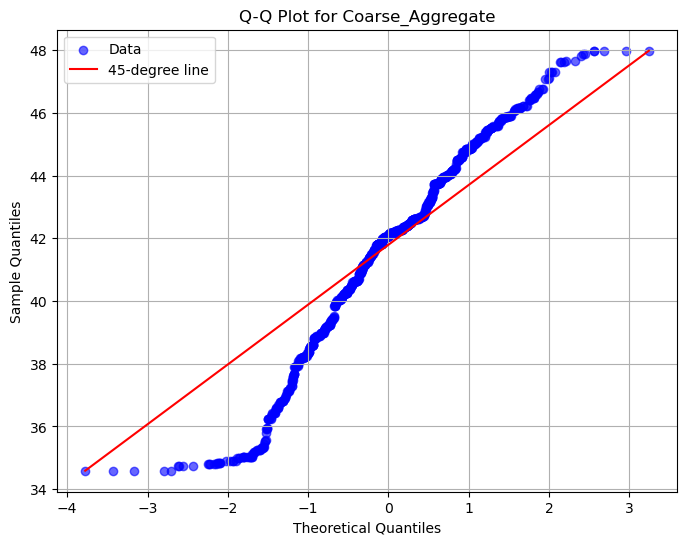

In [41]:
#test for Coarse aggregate
test_normality(percentage_df, 'Coarse_Aggregate', alpha=0.05)

#make qq plot for coarse aggregate
make_qq_plots(percentage_df, 'Coarse_Aggregate')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9848217964172363, pvalue=1.0328029098616298e-08)


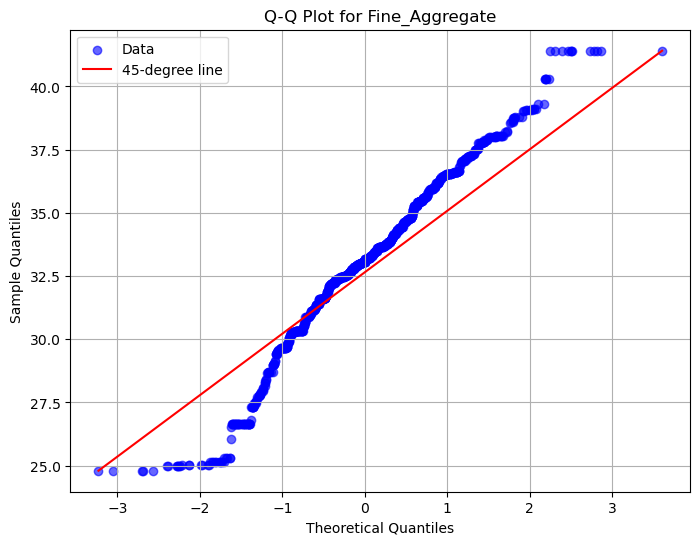

In [42]:
#test for fine aggregate
test_normality(percentage_df, 'Fine_Aggregate', alpha=0.05)

#make qq plot for fine aggregate
make_qq_plots(percentage_df, 'Fine_Aggregate')

The p-value is less than the alpha; reject Ho.
ShapiroResult (statistic=0.9857363104820251, pvalue=2.4834436729292975e-08)


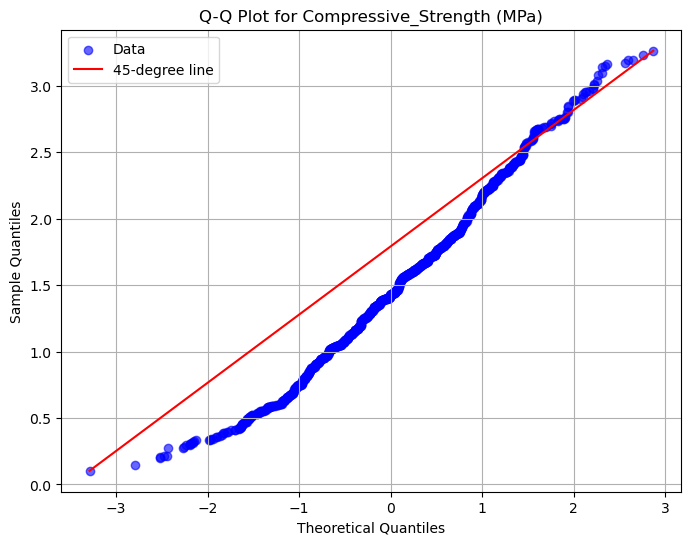

In [43]:
#test for stength
test_normality(percentage_df, 'Compressive_Strength (MPa)', alpha=0.05)

#make qq plot for strength
make_qq_plots(percentage_df, 'Compressive_Strength (MPa)')

Overall the pattern is very similar to the scalar analysis

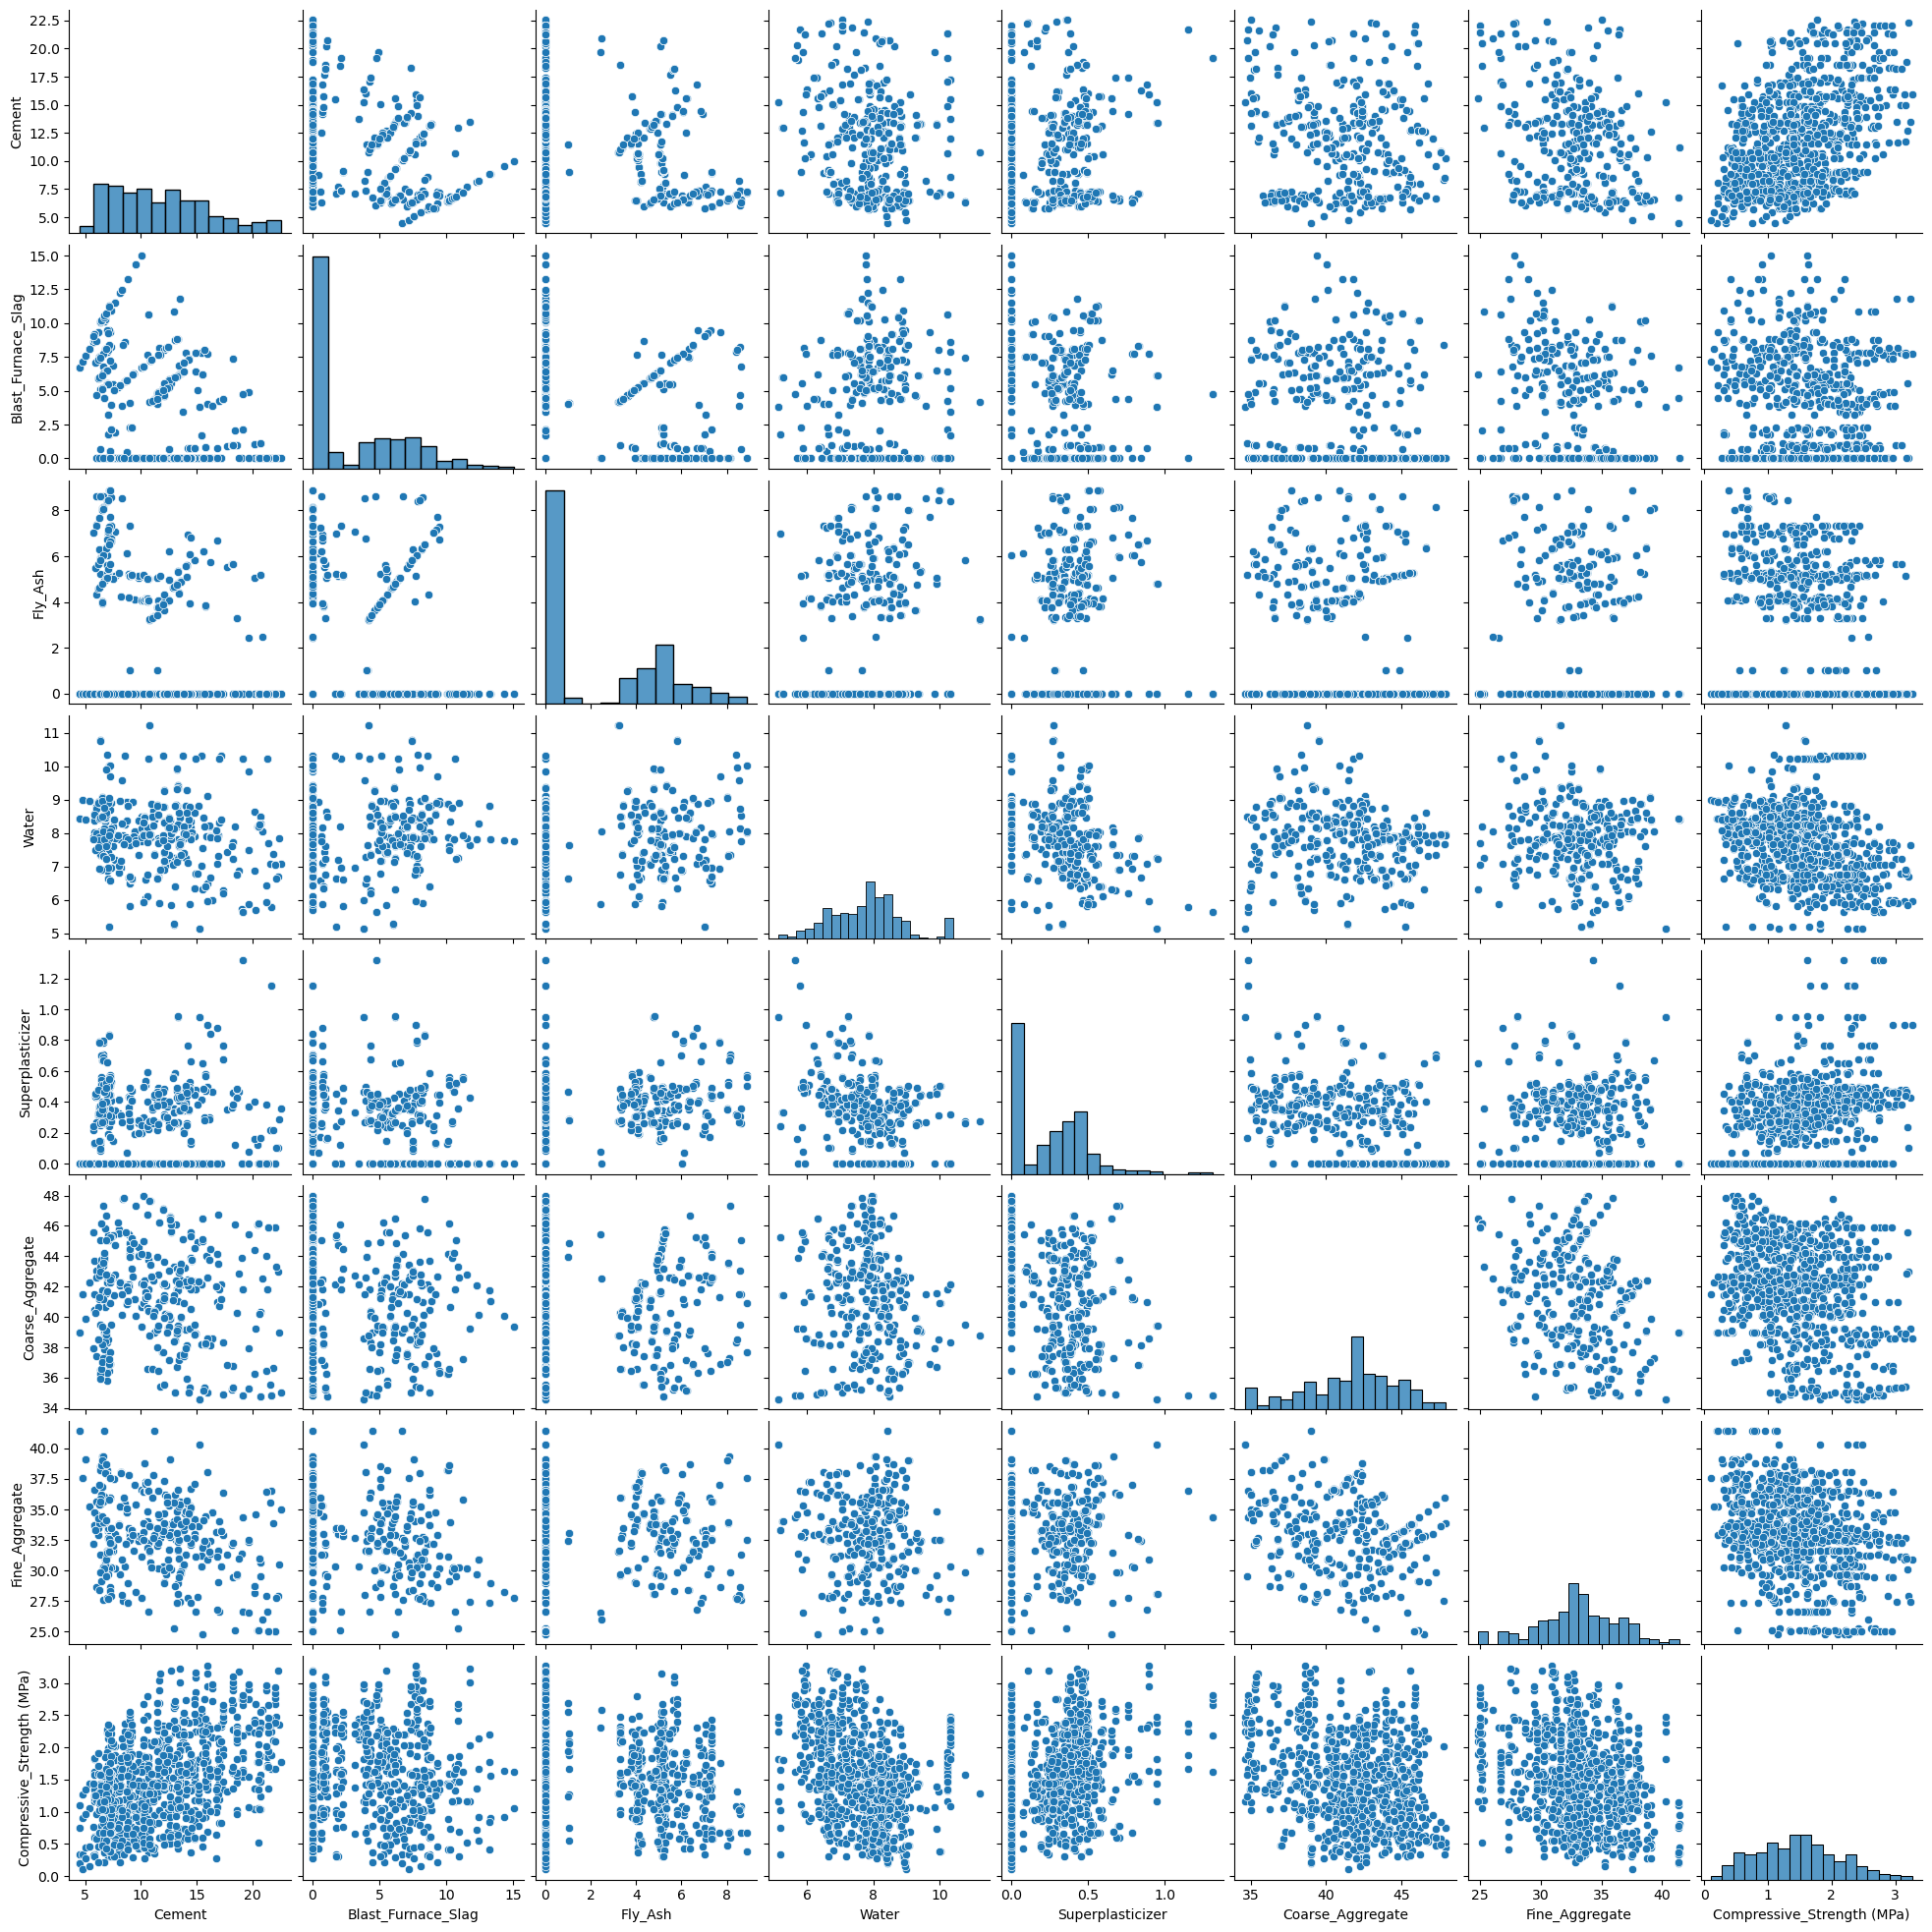

In [44]:
#pair plot
sns.pairplot(percentage_df)

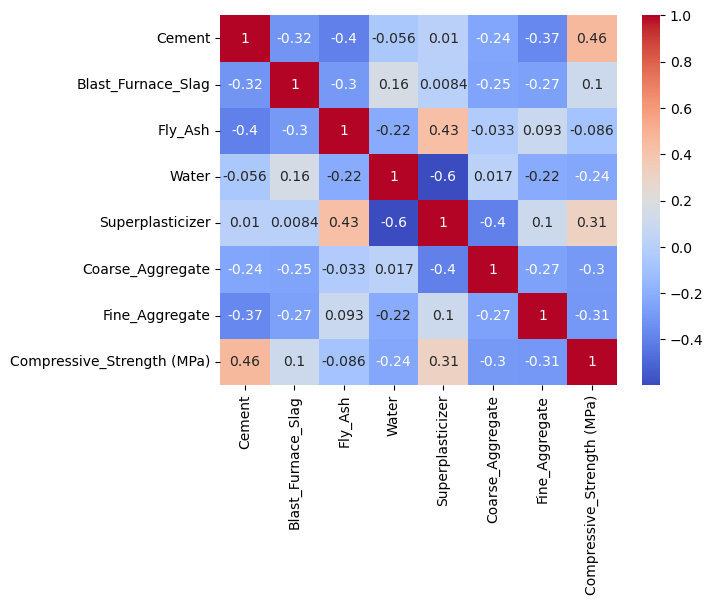

In [45]:
correlation = percentage_df.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

slight change in correlation